In [ ]:
!pip install biopython
#!pip install rdkit-pypi
!pip install rdkit-pypi==2022.3.5
!pip install PyTDC
!pip install pysmiles
!pip install datamol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import traceback
import tarfile
import random
import numpy as np
import networkx as nx
import random
from Bio import SeqIO
import itertools
from typing import List, Tuple
import string
import urllib,ast,json
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import PandasTools
from tdc.multi_pred import DTI
import datamol as dm
dm.disable_rdkit_log()

In [ ]:
lig_dict={'11314340': 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 '24889392': 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 '11409972': 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3)OC4=NC=NC(=C4)NC)C(F)(F)F',
 '11338033': 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl',
 '10184653': 'CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4',
 '5287969': 'CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC=C4Cl)O)O',
 '6450551': 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4',
 '11364421': 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 '9926054': 'CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl',
 '16007391': 'CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(=O)NC4=CC(=CC=C4)F)CCO',
 '5328940': 'CN1CCN(CC1)CCCOC2=C(C=C3C(=C2)N=CC(=C3NC4=CC(=C(C=C4Cl)Cl)OC)C#N)OC',
 '11234052': 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 '11656518': 'CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)(F)F)N=C1NC5=CC=C(C=C5)C(F)(F)F',
 '6918454': 'C1CC1CONC(=O)C2=C(C(=C(C=C2)F)F)NC3=C(C=C(C=C3)I)Cl',
 '156414': 'C=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4',
 '9933475': 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NC4=CC(=C(C=C43)OC)OCCCN5CCCC5',
 '11626560': 'CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N=C3)C4CCNCC4)N',
 '3062316': 'CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=NC(=NC(=C3)N4CCN(CC4)CCO)C',
 '156422': 'CC1=CC=C(C=C1)N2C(=CC(=N2)C(C)(C)C)NC(=O)NC3=CC=C(C4=CC=CC=C43)OCCN5CCOCC5',
 '44150621': 'CC(C(=O)O)O.CN1CCN(CC1)C2=CC3=C(C=C2)NC(=C4C(=C5C(=NC4=O)C=CC=C5F)N)N3.O',
 '176167': 'CN1C=C(C2=CC=CC=C21)C3=C(C(=O)NC3=O)C4=CN(C5=CC=CC=C54)C6CCN(CC6)CC7=CC=CC=N7',
 '176870': 'COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC',
 '42642645': 'COC1=CC2=C(C=CN=C2C=C1OCCCN3CCOCC3)OC4=C(C=C(C=C4)NC(=O)C5(CC5)C(=O)NC6=CC=C(C=C6)F)F',
 '11717001': 'C1CC(=NO)C2=C1C=C(C=C2)C3=CN(N=C3C4=CC=NC=C4)CCO',
 '16725726': 'CCN1C2=C(C(=NC=C2OCC3CCCNC3)C#CC(C)(C)O)N=C1C4=NON=C4N',
 '11617559': 'COC1=CC=C(C=C1)COC2=C(C=C(C=C2)CC3=CN=C(N=C3N)N)OC',
 '123631': 'COC1=C(C=C2C(=C1)N=CN=C2NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4',
 '5291': 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5',
 '4908365': 'CN1CCN(CC1)C(=O)C2=CC3=C(N2)C=CC(=C3)Cl',
 '11427553': 'C1CN(CCN1)C(=O)C2=CC=C(C=C2)C=CC3=NNC4=CC=CC=C43',
 '208908': 'CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl',
 '126565': 'CC12C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)(CO)O',
 '11485656': 'CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=CC=C3)NN=C4N',
 '9929127': 'CC1=C(C=CC=N1)C(=O)NC2=C3C(=CC(=C2OC)Cl)C4=C(N3)C=NC=C4',
 '11712649': 'C1C2=CN=C(N=C2C3=C(C=C(C=C3)Cl)C(=N1)C4=C(C=CC=C4F)F)NC5=CC=C(C=C5)C(=O)O',
 '10074640': 'CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC(=CS4)C5=CN=CC=C5',
 '51004351': 'CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)N(C)C(=O)C9=CC=CC=C9)OC',
 '11667893': 'CC1(CNC2=C1C=CC(=C2)NC(=O)C3=C(N=CC=C3)NCC4=CC=NC=C4)C',
 '9915743': 'CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)OCC4=CC=CC=N4)Cl)C#N)NC(=O)C=CCN(C)C',
 '644241': 'CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)N3C=C(N=C3)C)C(F)(F)F)NC4=NC=CC(=N4)C5=CN=CC=C5',
 '447077': 'CN1C2=NC(=NC=C2C=C(C1=O)C3=C(C=CC=C3Cl)Cl)NC4=CC(=CC=C4)SC',
 '10461815': 'CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=CC(=C5)S(=O)(=O)CC6=C(C=CC=C6Cl)Cl)NC4=O',
 '9884685': 'C1COCCN1C2=NC(=NC3=C2OC4=C3C=CC=N4)C5=CC(=CC=C5)O',
 '24180719': 'CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=NC=C(C=C23)Cl)F',
 '25243800': 'CC(C)N1C2=C(C(=C3C=C4C=C(C=CC4=N3)O)N1)C(=NC=N2)N',
 '10113978': 'CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=C4C=C3)C)C)S(=O)(=O)N',
 '17755052': 'CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6',
 '11984591': 'CC1(C(=O)NC2=C(O1)C=CC(=N2)NC3=NC(=NC=C3F)NC4=CC(=C(C(=C4)OC)OC)OC)C.C1=CC=C(C=C1)S(=O)(=O)O',
 '153999': 'CN(C)CC1CCN2C=C(C3=CC=CC=C32)C4=C(C5=CN(CCO1)C6=CC=CC=C65)C(=O)NC4=O',
 '25127112': 'C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3.OP(=O)(O)O',
 '176155': 'CS(=O)C1=CC=C(C=C1)C2=NC(=C(N2)C3=CC=NC=C3)C4=CC=C(C=C4)F',
 '24779724': 'CN1C=C(C=N1)C2=NN3C(=NN=C3SC4=CC5=C(C=C4)N=CC=C5)C=C2',
 '3025986': 'CC(C)(C)C1=CN=C(O1)CSC2=CN=C(S2)NC(=O)C3CCNCC3',
 '10138260': 'CC1=C(NC(=C1C(=O)NCC(CN2CCOCC2)O)C)C=C3C4=C(C=CC(=C4)F)NC3=O',
 '10127622': 'CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=O)NOCCO',
 '216239': 'CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F',
 '44259': 'CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)NC)OC',
 '5329102': 'CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)F)NC2=O)C',
 '16038120': 'CC(C)S(=O)(=O)C1=CC=CC=C1NC2=NC(=NC=C2Cl)NC3=C(C=C(C=C3)N4CCC(CC4)N5CCN(CC5)C)OC',
 '10427712': 'C1=CC(=CC(=C1)O)C2=NC3=C(N=C2C4=CC(=CC=C4)O)N=C(N=C3N)N',
 '16722836': 'CC1=CN=C(N=C1NC2=CC(=CC=C2)S(=O)(=O)NC(C)(C)C)NC3=CC=C(C=C3)OCCN4CCCC4',
 '3038522': 'CC(C)OC1=CC=C(C=C1)NC(=O)N2CCN(CC2)C3=NC=NC4=CC(=C(C=C43)OC)OCCCN5CCCCC5',
 '9926791': 'CC1CCN(CC1N(C)C2=NC=NC3=C2C=CN3)C(=O)CC#N',
 '5494449': 'CC1=CC(=NN1)NC2=NC(=NC(=C2)N3CCN(CC3)C)SC4=CC=C(C=C4)NC(=O)C5CC5',
 '3038525': 'C1=CC(=C(C(=C1)Cl)C2=C3C=CC(=NN3C=NC2=O)SC4=C(C=C(C=C4)F)F)Cl',
 '3081361': 'CN1CCC(CC1)COC2=C(C=C3C(=C2)N=CN=C3NC4=C(C=C(C=C4)Br)F)OC',
 '9809715': 'CN1CCN(CC1)CC(=O)N(C)C2=CC=C(C=C2)NC(=C3C4=C(C=C(C=C4)C(=O)OC)NC3=O)C5=CC=CC=C5',
 '151194': 'C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4'}

In [ ]:
ligs=list(lig_dict.values())
ligs

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3)OC4=NC=NC(=C4)NC)C(F)(F)F',
 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl',
 'CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4',
 'CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC=C4Cl)O)O',
 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4',
 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 'CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl',
 'CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(=O)NC4=CC(=CC=C4)F)CCO',
 'CN1CCN(CC1)CCCOC2=C(C=C3C(=C2)N=CC(=C3NC4=CC(=C(C=C4Cl)Cl)OC)C#N)OC',
 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 'CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)(F)F)N=C1NC5=CC=C(C=C5)C(F)(F)F',
 'C1CC1CONC(=O)C2=C(C(=C(C=C2)F)F)NC3=C(C=C(C=C3)I)Cl',
 'C=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OCCCN4CCOCC4',
 'CC1=CC2=

In [ ]:
pd.set_option('display.max_rows', 70)

In [ ]:
df = pd.DataFrame.from_dict(lig_dict.items())
df.columns = ['ID', 'Drug']
df

,ID,Drug
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...
5,5287969,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...
6,6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...
7,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...
8,9926054,CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl
9,16007391,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...


In [ ]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Drug')
# df=df.drop(['Target_ID','Target','Y'],axis=1)
# df = df.drop_duplicates(subset='Drug_ID', keep='first')
df.shape

(68, 3)

In [ ]:
df["#Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())
df["#Bonds"] = df['ROMol'].map(lambda x: x.GetNumBonds())
df["Length_SMILES"] = df['Drug'].map(lambda x: len(x))

In [ ]:
df["#Chlorine Atoms"] = df['Drug'].map(lambda x: x.count("Cl"))

In [ ]:
df["#Fluorine Atoms"] = df['Drug'].map(lambda x: x.count("F"))
df["#Bromine Atoms"] = df['Drug'].map(lambda x: x.count("Br"))
df["#Double_O2_Atoms"] = df['Drug'].map(lambda x: x.count("=O"))

,ID,Drug,ROMol,#Atoms,#Bonds,Length_SMILES,#Chlorine Atoms,#Fluorine Atoms,#Bromine Atoms,#Double_O2_Atoms
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,,27,30,51,0,0,0,0
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,,40,45,77,0,0,0,1
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...,,38,41,72,0,3,0,1
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl,,25,27,48,2,0,0,2
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,,34,37,67,1,1,0,1
5,5287969,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...,,28,31,55,1,0,0,1
6,6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,,28,31,54,0,0,0,1
7,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,,38,42,70,0,0,0,2
8,9926054,CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl,,20,21,40,1,0,0,0
9,16007391,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,,37,40,68,0,1,0,1

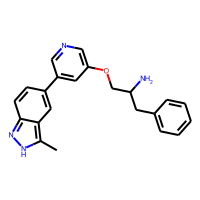
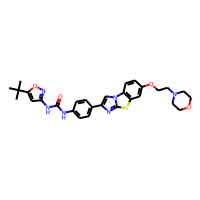
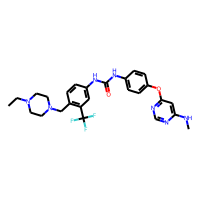
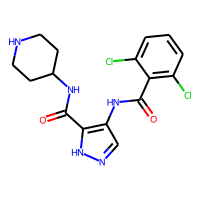
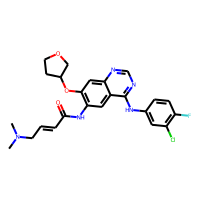
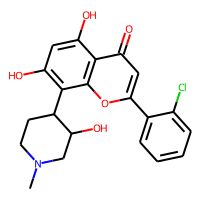
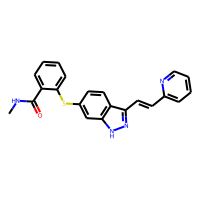
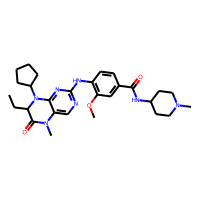
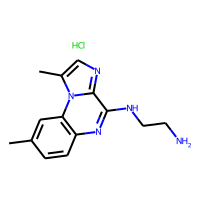
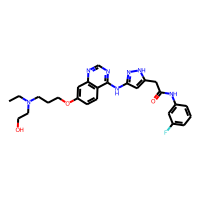
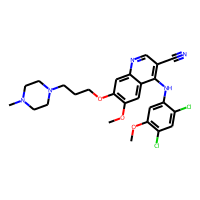
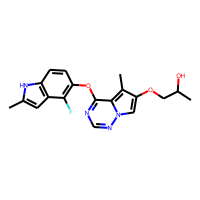
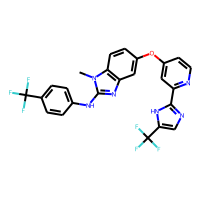
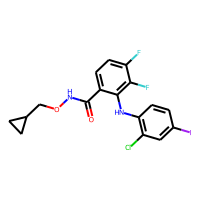
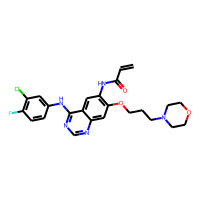
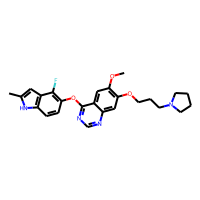
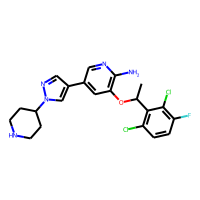
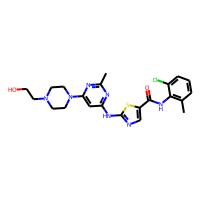
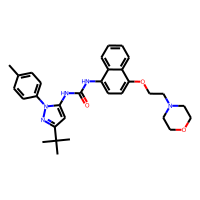
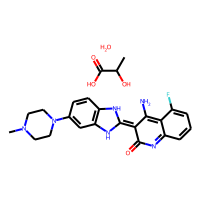
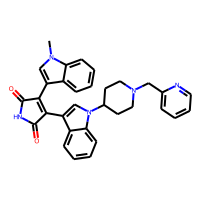
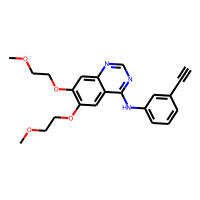
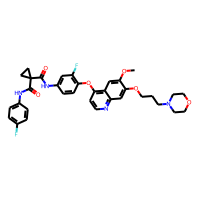
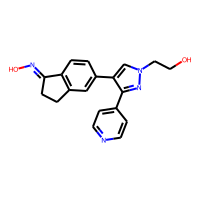
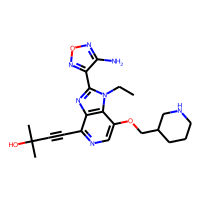
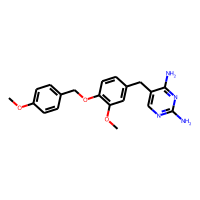
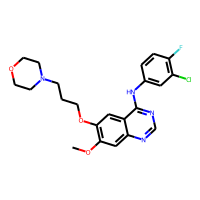
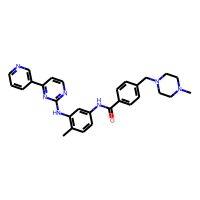
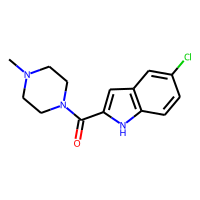
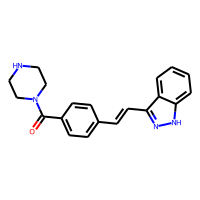
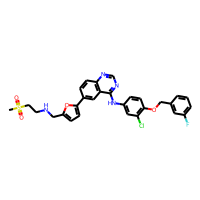
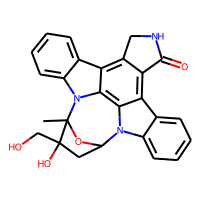
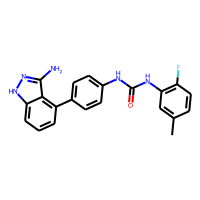
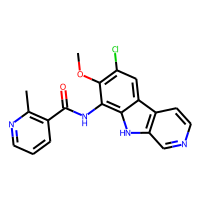
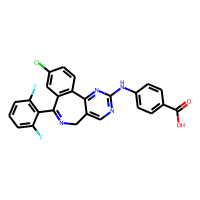
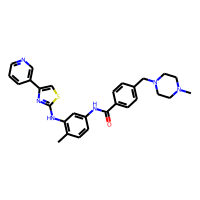
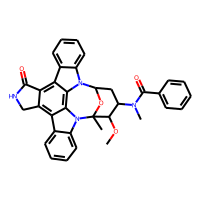
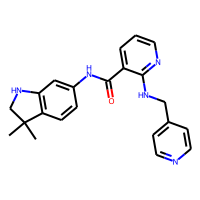
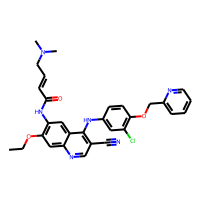
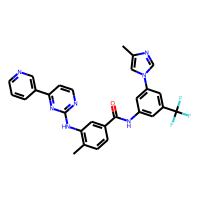
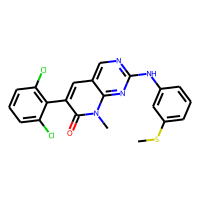
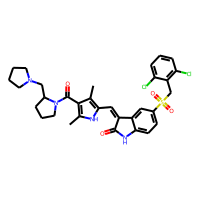
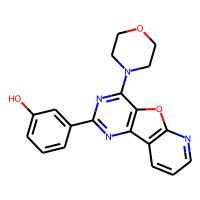
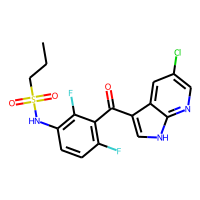
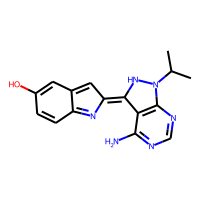
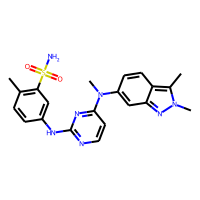
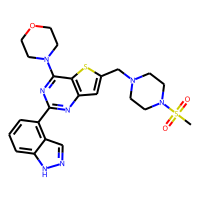
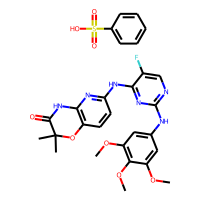
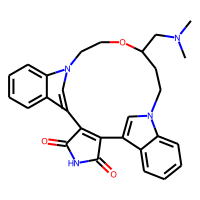
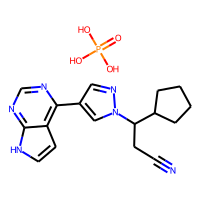
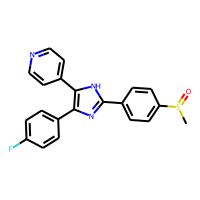
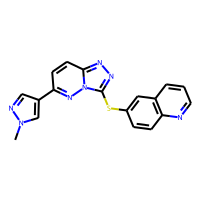
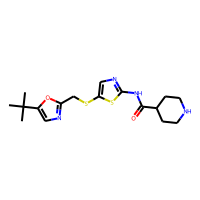
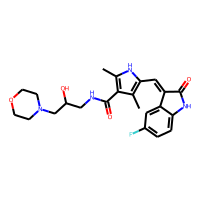
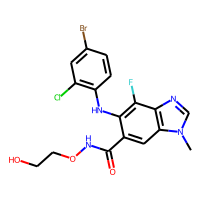
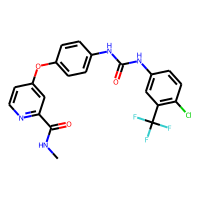
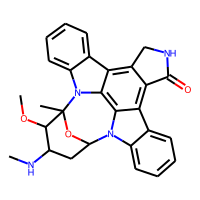
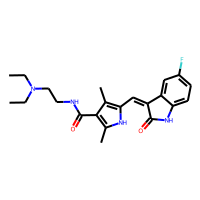
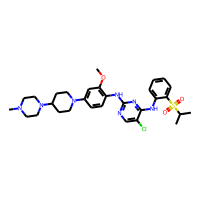
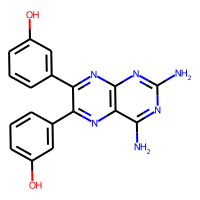
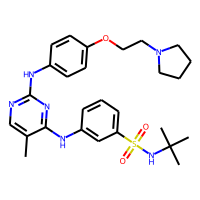
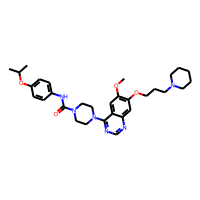
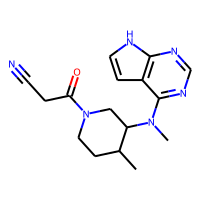
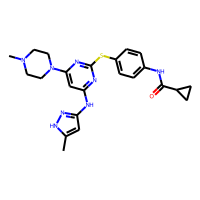
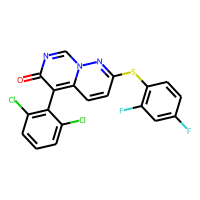
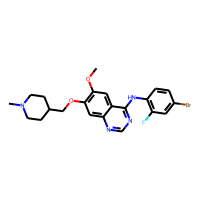
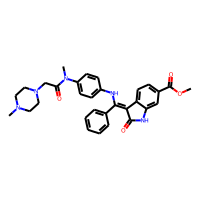
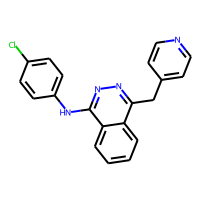

In [ ]:
df

In [ ]:
m="C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=NC=C4"

In [ ]:
def get_num_R_group_atoms(smiles):
    br=smiles.count("Br")
    cl=smiles.count("Cl")
    f=smiles.count("F")
    o=smiles.count("(=O)")
    return br,cl,f,o

In [ ]:
print(get_num_R_group_atoms(m))

(0, 1, 0, 0)


In [ ]:
def random_replace(text, token, replace, num_replacements):
      num_tokens = text.count(token)
      points = [0] + sorted(random.sample(range(1,num_tokens+1),num_replacements)) + [num_tokens+1]
      return replace.join(token.join(text.split(token)[i:j]) for i,j in zip(points,points[1:]))

In [39]:
def congeneric_smiles(smile):
  br=smile.count("Br")
  cl=smile.count("Cl")
  f=smile.count("F")
  o=smile.count("(=O)")

  #check for halogens that are present and replace with alternative halogen randomly one instance of the existing halogen
  if cl!=0:
    upd_smile=random_replace(smile,'Cl', 'Br', 1)
    return upd_smile

  if f!=0:
    upd_smile=random_replace(smile,'F', 'Br', 1)
    return upd_smile

  if br!=0:
    upd_smile=random_replace(smile,'Br', 'Cl', 1)
    return upd_smile

  
  if cl==0 and br==0 and f==0:

    #check if double bond oxygen exists
    if o!=0:
      upd_smile=random_replace(smile,'(=O)', '', 1)
      return upd_smile

    #if no halogen is present or no double bond oxygen exists add halogen (Cl) at the end of the string
    else:
      upd_smile=smile+'Cl'
      return upd_smile
  

,ID,Drug,ROMol,#Atoms,#Bonds,Length_SMILES,#Chlorine Atoms,#Fluorine Atoms,#Bromine Atoms,#Double_O2_Atoms
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,,27,30,51,0,0,0,0
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,,40,45,77,0,0,0,1
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...,,38,41,72,0,3,0,1
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl,,25,27,48,2,0,0,2
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,,34,37,67,1,1,0,1
5,5287969,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...,,28,31,55,1,0,0,1
6,6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,,28,31,54,0,0,0,1
7,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,,38,42,70,0,0,0,2
8,9926054,CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl,,20,21,40,1,0,0,0
9,16007391,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,,37,40,68,0,1,0,1

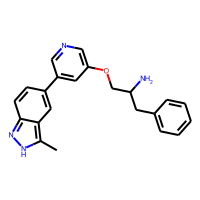
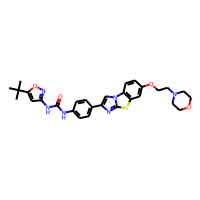
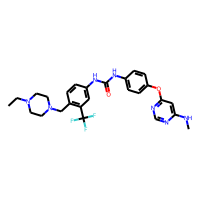
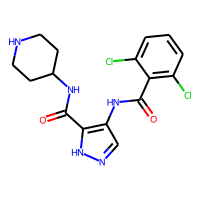
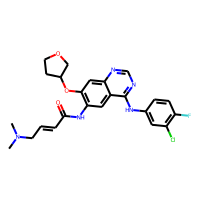
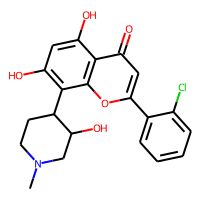
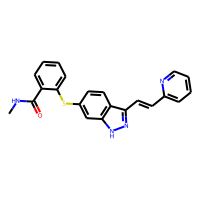
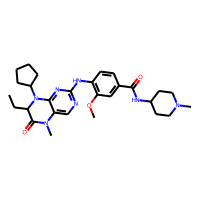
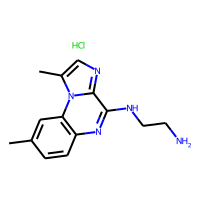
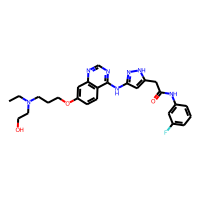
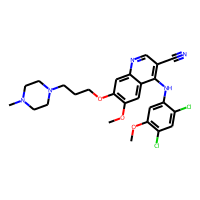
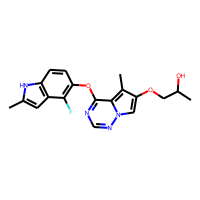
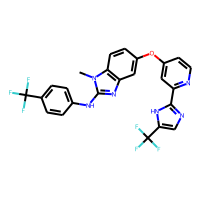
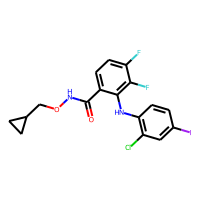
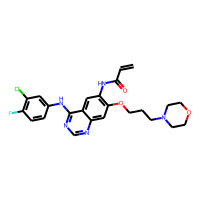
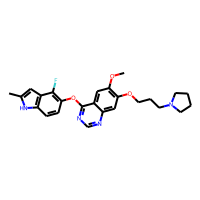
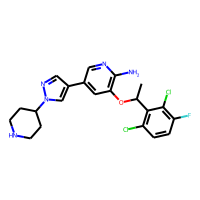
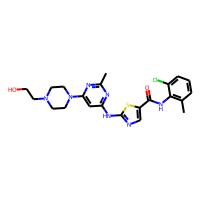
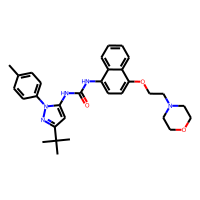
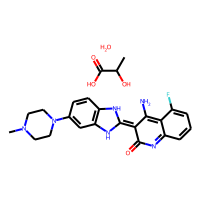
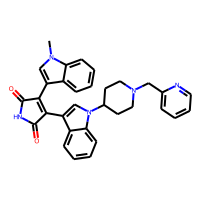
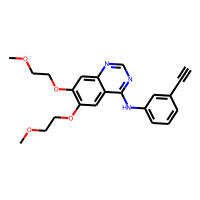
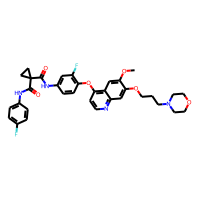
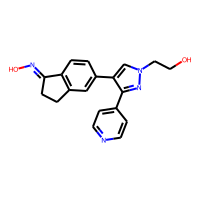
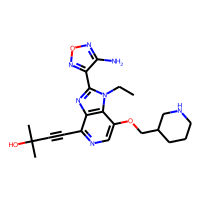
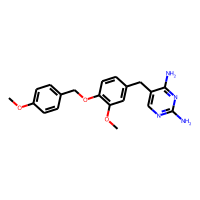
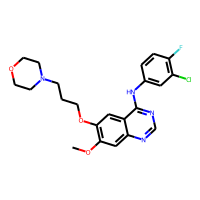
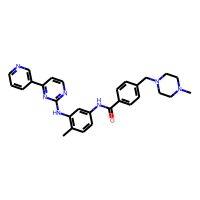
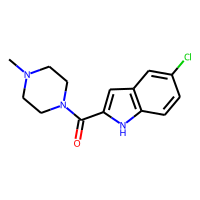
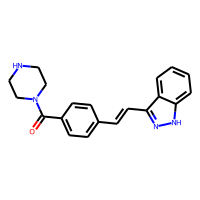
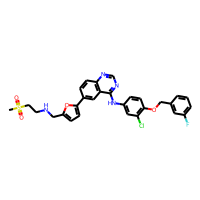
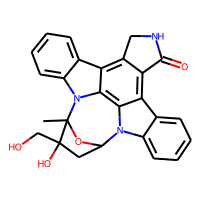
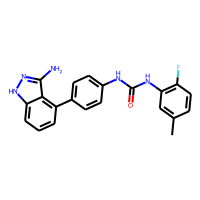
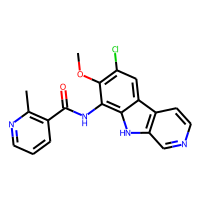
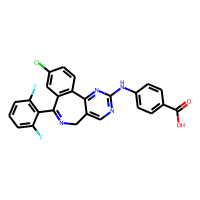
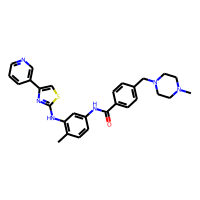
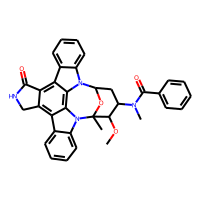
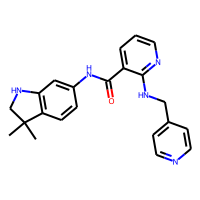
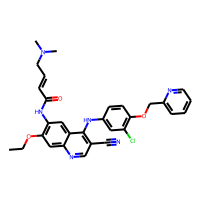
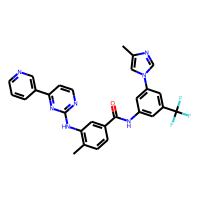
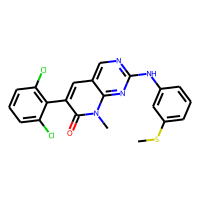
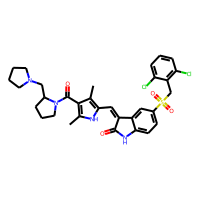
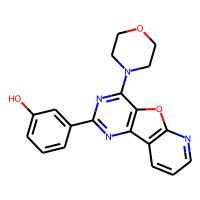
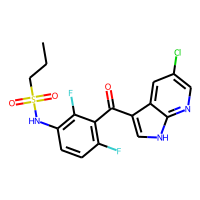
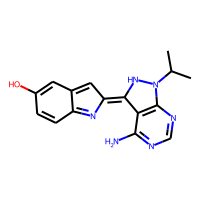
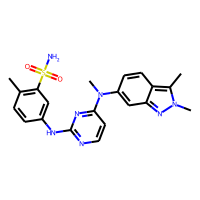
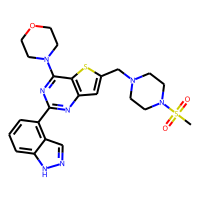
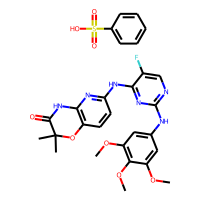
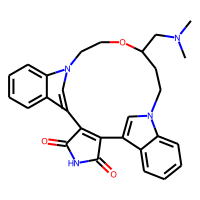
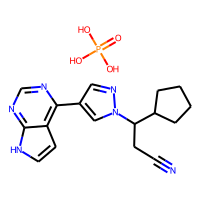
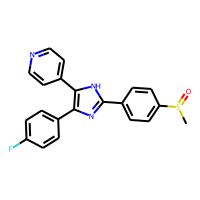
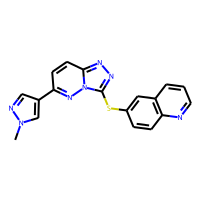
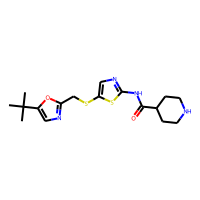
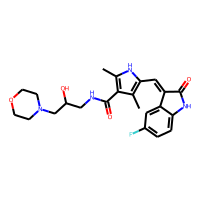
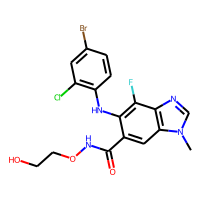
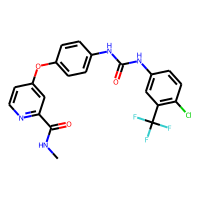
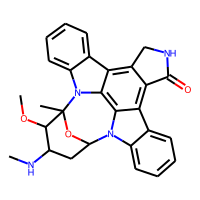
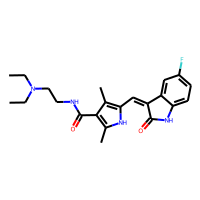
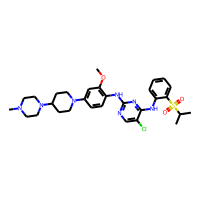
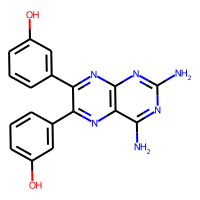
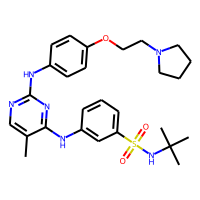
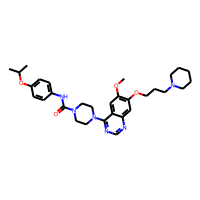
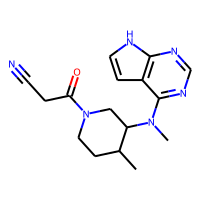
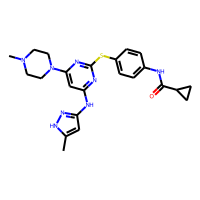
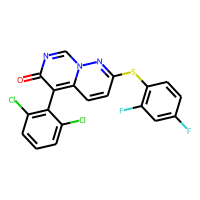
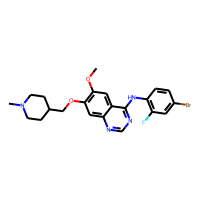
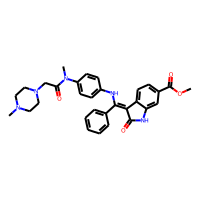
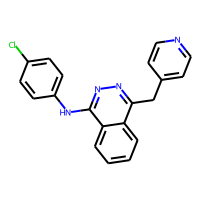

In [ ]:
df

In [40]:
df["upd_smiles"] = df['Drug'].map(lambda x: congeneric_smiles(x))

,ID,Drug,ROMol,#Atoms,#Bonds,Length_SMILES,#Chlorine Atoms,#Fluorine Atoms,#Bromine Atoms,#Double_O2_Atoms,upd_smiles,updated_mol
0,11314340,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,,27,30,51,0,0,0,0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,
1,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,,40,45,77,0,0,0,1,CC(C)(C)C1=CC(=NO1)NCNC2=CC=C(C=C2)C3=CN4C5=C(...,
2,11409972,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...,,38,41,72,0,3,0,1,CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3...,
3,11338033,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl,,25,27,48,2,0,0,2,C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Br)Cl,
4,10184653,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,,34,37,67,1,1,0,1,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,
5,5287969,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...,,28,31,55,1,0,0,1,CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC...,
6,6450551,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,,28,31,54,0,0,0,1,CNCC1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=C...,
7,11364421,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,,38,42,70,0,0,0,2,CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C...,
8,9926054,CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl,,20,21,40,1,0,0,0,CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Br,
9,16007391,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,,37,40,68,0,1,0,1,CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(...,

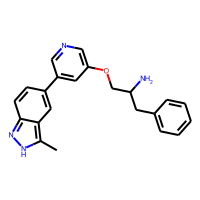
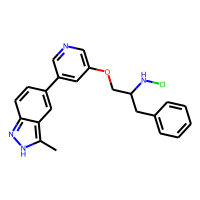
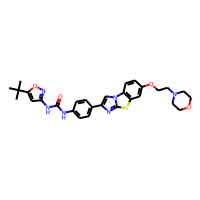
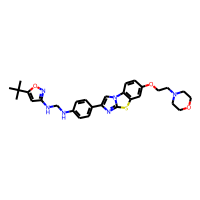
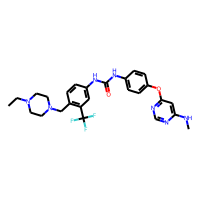
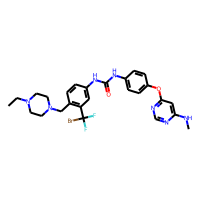
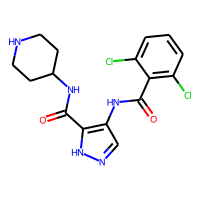
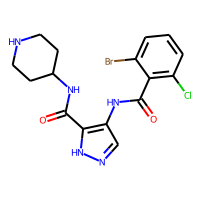
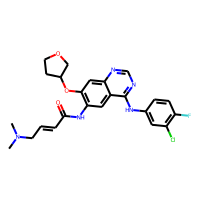
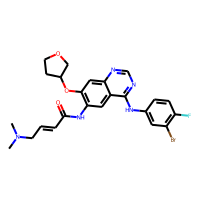
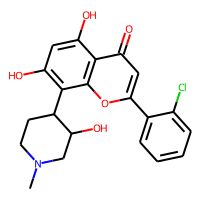
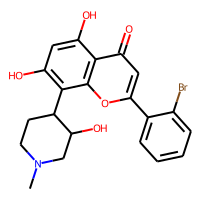
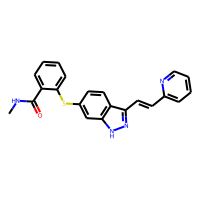
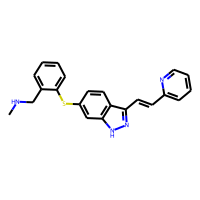
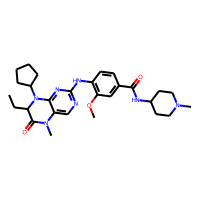
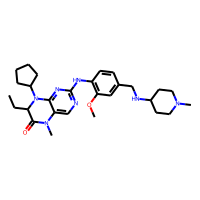
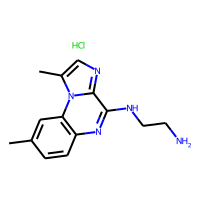
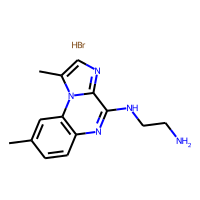
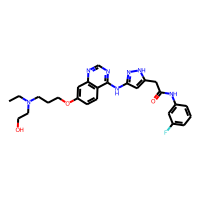
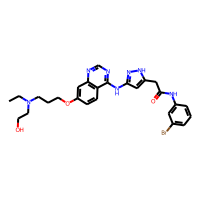
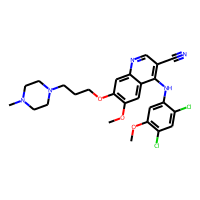
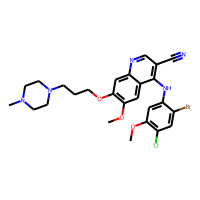
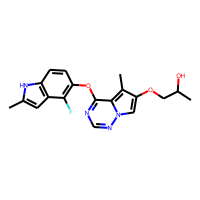
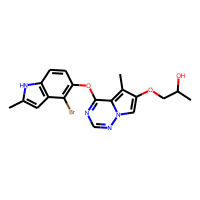
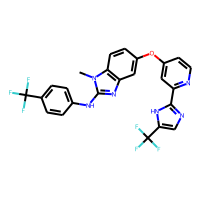
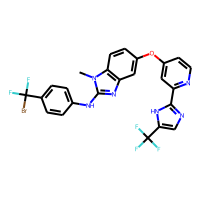
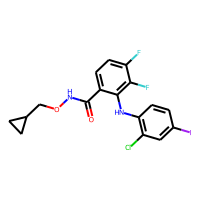
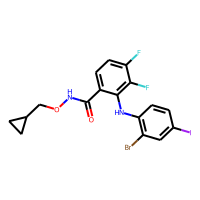
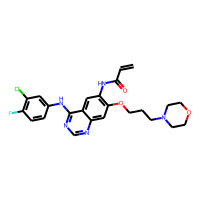
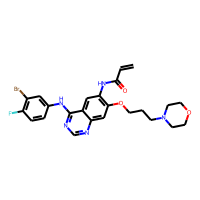
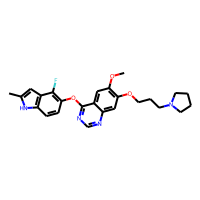
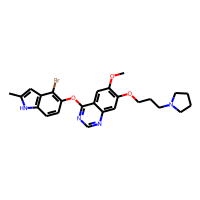
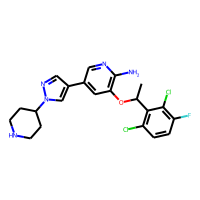
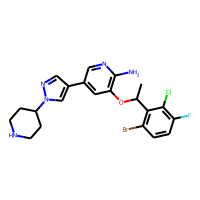
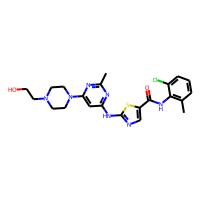
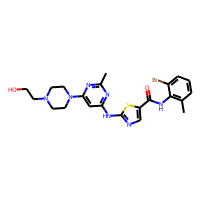
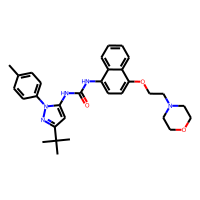
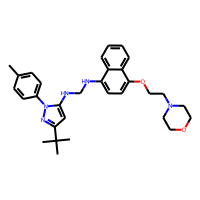
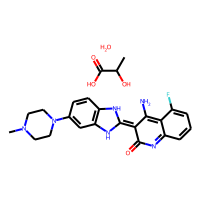
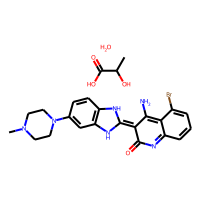
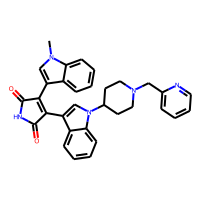
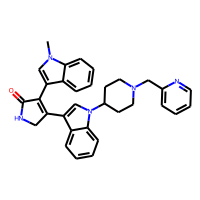
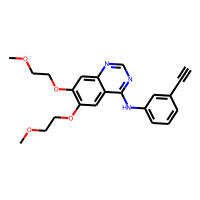
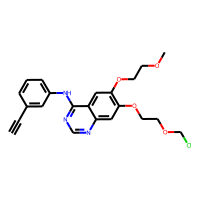
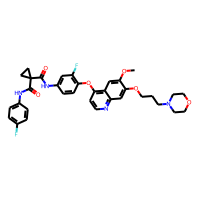
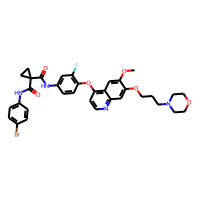
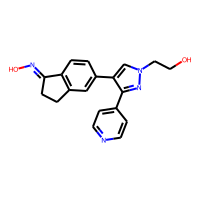
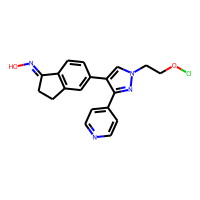
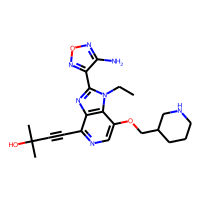
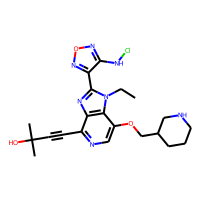
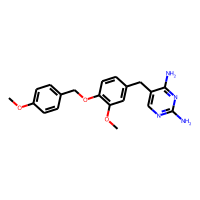
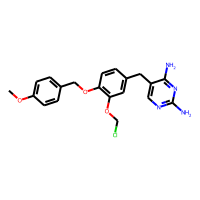
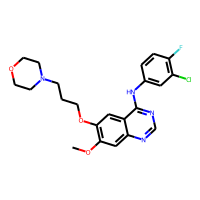
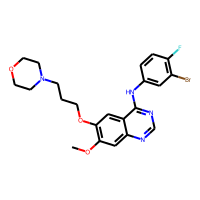
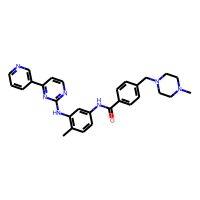
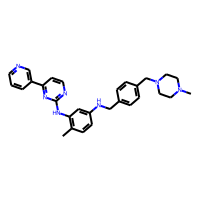
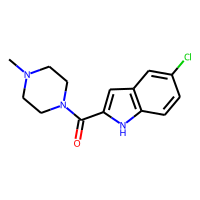
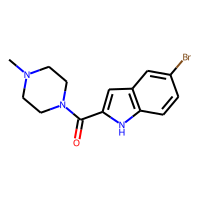
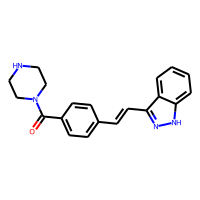
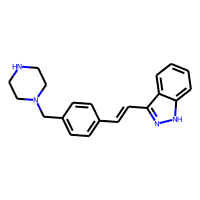
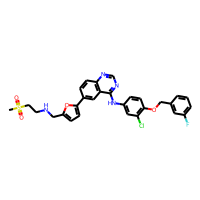
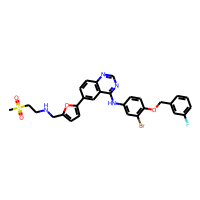
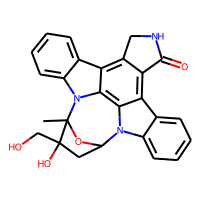
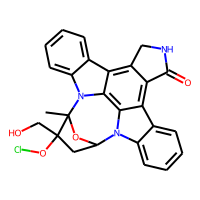
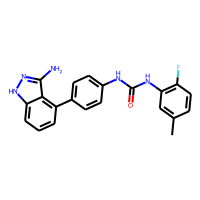
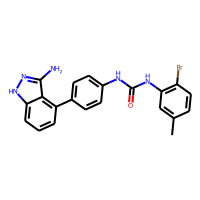
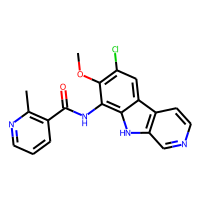
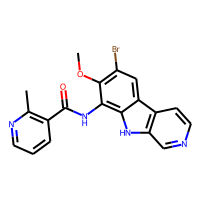
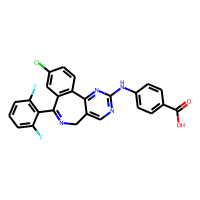
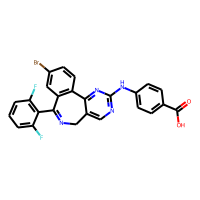
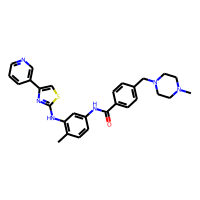
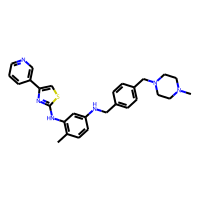
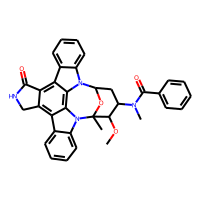
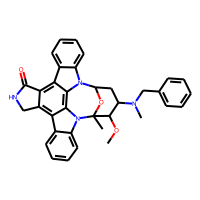
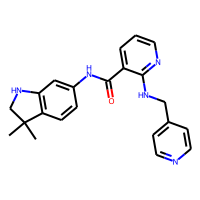
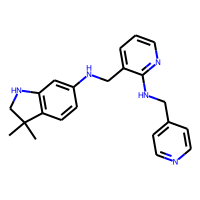
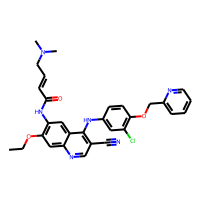
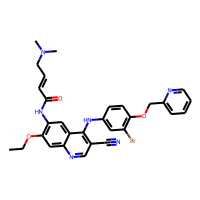
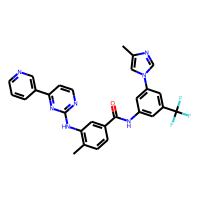
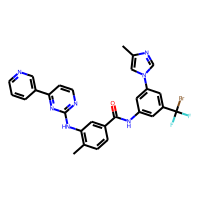
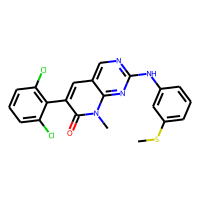
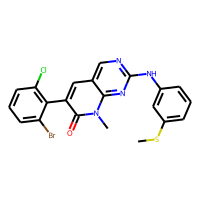
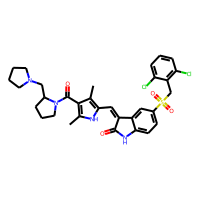
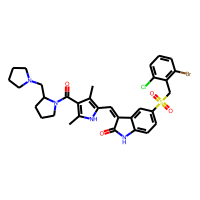
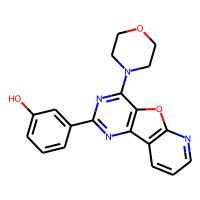
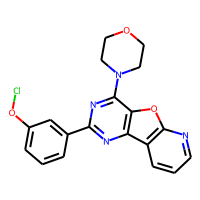
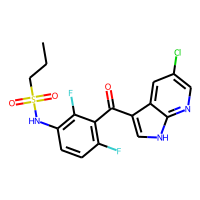
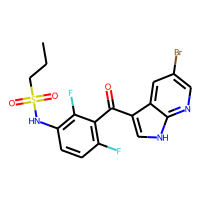
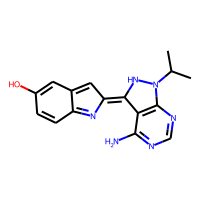
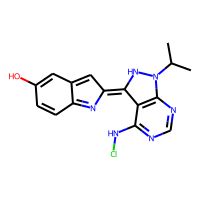
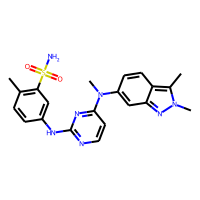
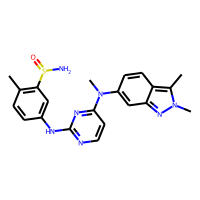
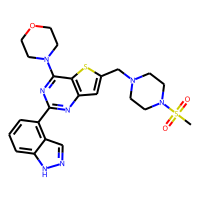
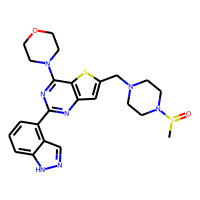
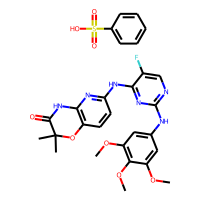
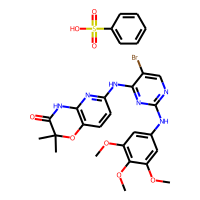
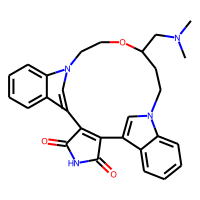
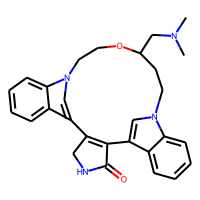
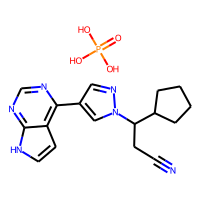
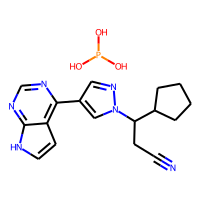
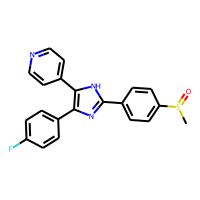
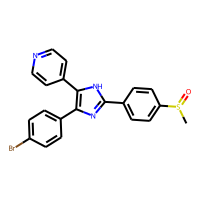
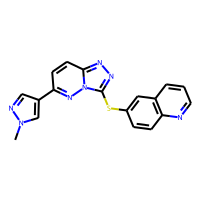
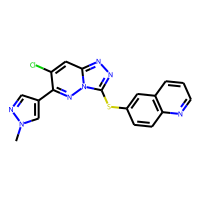
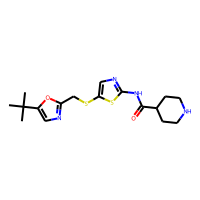
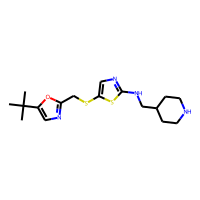
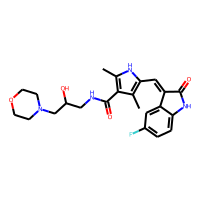
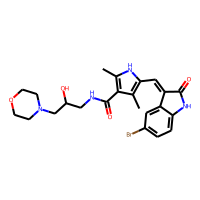
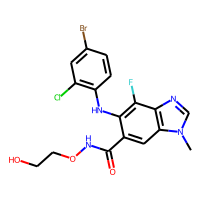
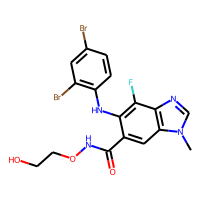
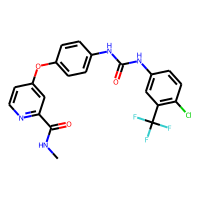
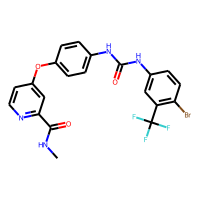
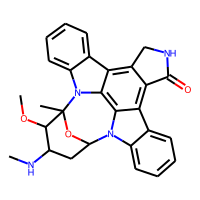
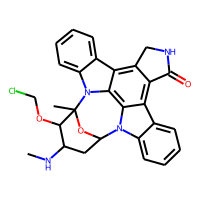
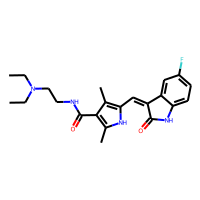
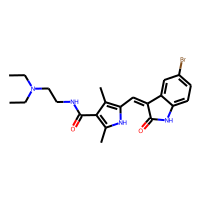
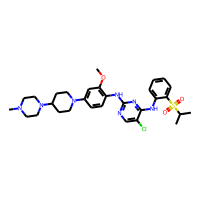
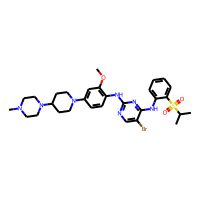
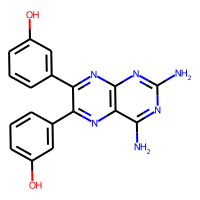
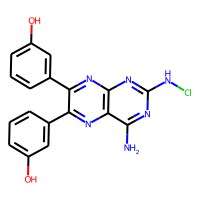
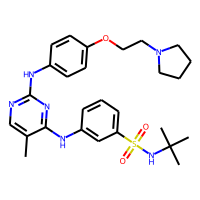
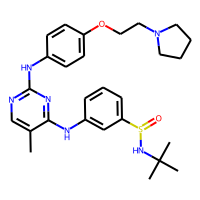
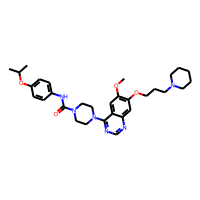
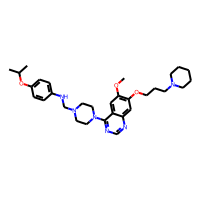
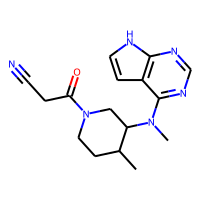
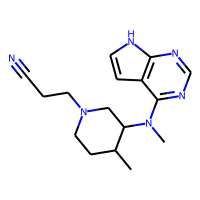
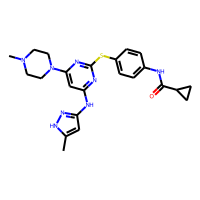
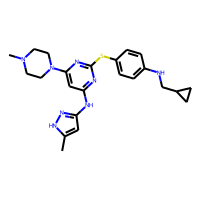
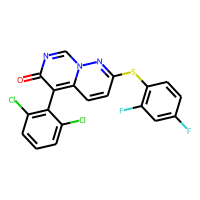
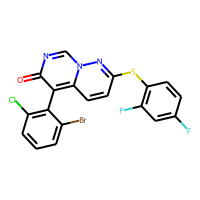
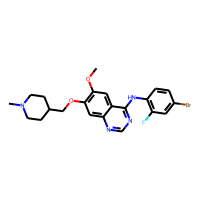
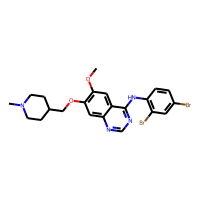
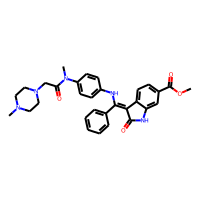
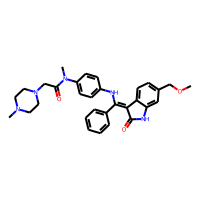
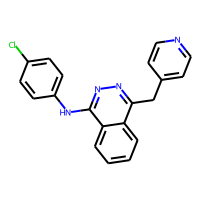
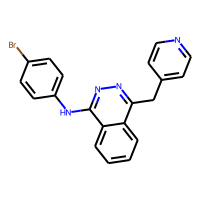

In [41]:
PandasTools.AddMoleculeColumnToFrame(df,smilesCol="upd_smiles",molCol="updated_mol",)
df

In [ ]:
ligs_upd=[]
#make one change on each of the smiles
for smile in ligs:
  print(smile)
  mol=Chem.MolFromSmiles(smile)
  br=smile.count("Br")
  cl=smile.count("Cl")
  f=smile.count("F")
  o=smile.count("(=O)")

  
  #check for halogens that are present and replace with alternative halogen randomly one instance of the existing halogen
  if cl!=0:
    upd_smile=random_replace(smile,'Cl', 'F', 1)
    ligs_upd.append(upd_smile)
    continue

  if f!=0:
    upd_smile=random_replace(smile,'F', 'Cl', 1)
    ligs_upd.append(upd_smile)
    continue

  if br!=0:
    upd_smile=random_replace(smile,'Br', 'Cl', 1)
    ligs_upd.append(upd_smile)
    continue
  
  if cl==0 and br==0 and f==0:
    #check if double bond oxygen exists
    if o!=0:
      upd_smile=random_replace(smile,'=O', '', 1)
      ligs_upd.append(upd_smile)
      continue
    #if no halogen is present or no double bond oxygen exists add halogen (Cl) at the end of the string
    else:
      upd_smile=smile+'Cl'
      ligs_upd.append(upd_smile)
      continue